Face Recognition Using Deep Learning, Convolutional Neural Network

- import required libraries

In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D , Dense, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np 

- Reading the face images data

In [2]:
train_path = r"C:\Users\HiDeve\Downloads\Face-Images\Face Images\Final Training Images"

- Defining pre-processing transformations on raw images of training data

In [3]:
train_data_gen = ImageDataGenerator(

    # Scales the image data[0,255] between [0,1]
    rescale=1./255, 

    # Tilting the image by 10%
    shear_range=0.1, 

    # Zoom the image by 10% 
    zoom_range=0.1,  

    # flip the image by 180 degrees
    horizontal_flip=True
)

- Defining pre-processing transformations on raw images of validation data

In [4]:
validation_data_gen = ImageDataGenerator(rescale=1./255)

- Generating the Training Data

In [5]:
train_set = train_data_gen.flow_from_directory(
    train_path,  
    target_size=(64,64), 
    batch_size=32, 
    class_mode='categorical'
)

Found 244 images belonging to 16 classes.


- Generating the Testing Data

In [6]:
validation_set = validation_data_gen.flow_from_directory(
    train_path, 
    target_size=(64,64), 
    batch_size=32, 
    class_mode='categorical'
)

Found 244 images belonging to 16 classes.


- Printing class labels for each face

In [7]:
validation_set.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

- Creating a list of faces and classes

In [8]:
# class_indicies have the numeric tag for each face 
train_classes = train_set.class_indices
train_classes

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

- Storing the face and the numeric tag for future reference

In [9]:
result = {}
for FaceValue, FaceName in zip(train_classes.values(), train_classes.keys()): 
    result[FaceValue] = FaceName

- Saving the face map for future reference

In [10]:
import pickle 
with open("Result_Map.pkl", 'wb') as f: 
    pickle.dump(result, f, pickle.HIGHEST_PROTOCOL)
    
print("Mapping of face and its id")

Mapping of face and its id


In [11]:
output_Neurons = len(result)
print("the number of output neurons: ", output_Neurons)

the number of output neurons:  16


In [12]:
Classifier_Model = Sequential()

- Cnn Model

In [13]:
# CNN layer
Classifier_Model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), input_shape=(64,64,3), activation='relu'))
# Maxpooling 
Classifier_Model.add(MaxPooling2D(pool_size=(2,2))) 

# Additional layer of conv for better accuracy
Classifier_Model.add(Conv2D(filters=4, kernel_size=(5,5), strides=(2,2), activation='relu'))

# MaxPooling 
Classifier_Model.add(MaxPooling2D(pool_size=(2,2))) 

# Flattening 
Classifier_Model.add(Flatten()) 

# Fully connected neural network 
Classifier_Model.add(Dense(64, activation='relu'))

# Output layer 
Classifier_Model.add(Dense(output_Neurons, activation='softmax'))

# Compiling the Cnn 
Classifier_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\HiDeve\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
Classifier_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 4)           │           1,004 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 196)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,932 (58.33 KB)

 Trainable params: 14,932 (58.33 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
train_set.samples

244

fitting the model

In [75]:
import time 
# Measuring the time taken by the model to train
start_time = time.time()

# Starting the model training
Classifier_Model.fit(
    train_set,  
    steps_per_epoch=8,  
    epochs=60, 
    validation_data=validation_set,   
    validation_steps=4
)
End_time = time.time() 
print("Total time Taken: ", round((End_time-start_time)/60), "minutes")

C:\Users\HiDeve\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 691ms/step - accuracy: 0.0656 - loss: 2.8439 - val_accuracy: 0.1406 - val_loss: 2.7676
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.0738 - loss: 2.7624 - val_accuracy: 0.0703 - val_loss: 2.7604
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step - accuracy: 0.1393 - loss: 2.7576 - val_accuracy: 0.1797 - val_loss: 2.7387
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.1189 - loss: 2.7486 - val_accuracy: 0.1797 - val_loss: 2.7278
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 331ms/step - accuracy: 0.1230 - loss: 2.7254 - val_accuracy: 0.0938 - val_loss: 2.6914
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 332ms/step - accuracy: 0.0820 - loss: 2.7042 - val_accuracy: 0.1562 - val_loss: 2.6219
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.2336 - loss: 2.6547 - val_accuracy: 0.3594 - val_loss: 2.5918
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - accuracy: 0.2418 - loss: 2.5962 - val_accuracy: 0.3281 - val_loss:

- Saving the model

In [16]:
Classifier_Model.save("classifier_model.h5")

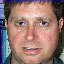

In [17]:
test_img_path = r"C:\Users\HiDeve\Downloads\Face-Images\Face Images\Final Training Images\face1\image_0002_Face_2.jpg"
test_img = image.load_img(test_img_path, target_size=(64,64)) 
test_img

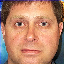

In [18]:
test_img_path_1 = r"C:\Users\HiDeve\Downloads\Face-Images\Face Images\Final Training Images\face1\image_0004_Face_1.jpg"
test_img_1 = image.load_img(test_img_path_1, target_size=(64,64))
test_img_1

- Converting the image into a numeric array

In [19]:
test_image_array = image.img_to_array(test_img)
print(test_image_array.shape)

(64, 64, 3)


- Reshaping the image array as one single sample for prediction

In [20]:
test_img_array_expdim = np.expand_dims(test_image_array, axis=0)
print(test_img_array_expdim.shape)

(1, 64, 64, 3)


- Generating probabilities for every face

In [21]:
pred = Classifier_Model.predict(test_img_array_expdim, verbose=0) 

In [22]:
# Printing probabilities for each class
print(pred)

[[1.4219395e-03 3.4821751e-05 1.1944776e-07 2.0904320e-11 3.4606540e-16
  2.2879180e-10 1.1566111e-25 3.2495420e-18 4.2464595e-12 8.5230542e-13
  3.3119612e-13 3.0770912e-03 2.4446424e-12 4.1187794e-38 1.6809829e-36
  9.9546611e-01]]


In [23]:
# Printing original face mapping 
print(result)

{0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}


In [24]:
print('Prediction: This is ', result[np.argmax(result)])

Prediction: This is  face1


In [25]:
test_img_path_2 = r"C:\Users\HiDeve\Downloads\Face-Images\Face Images\Final Training Images\face5\image_0077_Face_1.jpg"

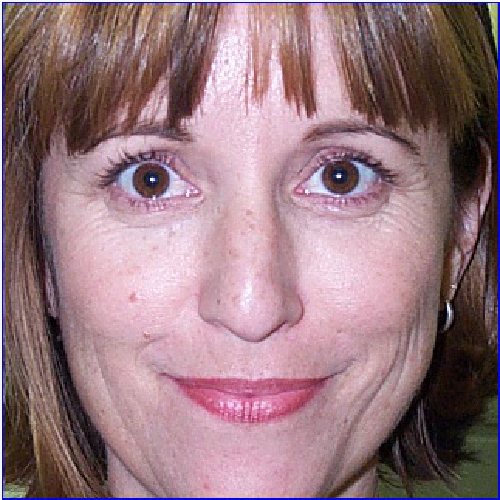

In [26]:
test_image_2 = image.load_img(test_img_path_2, target_size=(500,500))
test_image_2

In [27]:
test_img_array_2 = image.img_to_array(test_image_2)
print(test_img_array_2.shape)
test_img_array_2

(500, 500, 3)


array([[[249., 255., 248.],
        [249., 255., 248.],
        [248., 251., 255.],
        ...,
        [253., 241., 255.],
        [244., 250., 255.],
        [244., 250., 255.]],

       [[249., 255., 248.],
        [249., 255., 248.],
        [248., 251., 255.],
        ...,
        [253., 241., 255.],
        [244., 250., 255.],
        [244., 250., 255.]],

       [[244., 251., 255.],
        [244., 251., 255.],
        [ 20.,  22., 107.],
        ...,
        [ 19.,  16., 121.],
        [  7.,  14., 156.],
        [  7.,  14., 156.]],

       ...,

       [[251., 243., 255.],
        [251., 243., 255.],
        [ 15.,  17., 126.],
        ...,
        [ 45.,  60., 161.],
        [  9.,   9., 219.],
        [  9.,   9., 219.]],

       [[239., 248., 255.],
        [239., 248., 255.],
        [ 11.,  18., 160.],
        ...,
        [  8.,   8., 218.],
        [  0.,   0., 241.],
        [  0.,   0., 241.]],

       [[239., 248., 255.],
        [239., 248., 255.],
        [ 11.,  

In [28]:
# Number of values used to store the above image
500 * 500 * 3

750000

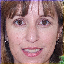

In [29]:
test_img_path_3 = r"C:\Users\HiDeve\Downloads\Face-Images\Face Images\Final Training Images\face5\image_0086_Face_1.jpg"
test_img_3 = image.load_img(test_img_path_3, target_size=(64,64))
test_img_3

In [33]:
test_img_array_3 = image.img_to_array(test_img_3)
test_img_array_expdim_3 = np.expand_dims(test_img_array_3, axis=0) 
pred1 = Classifier_Model.predict(test_img_array_expdim, verbose=0)
print(pred1.shape)
pred1.round()

(1, 16)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

In [34]:
test_img_path_4 = r"C:\Users\HiDeve\Downloads\Face-Images\Face Images\Final Training Images\face5\image_0088_Face_1/.jpg"
test_img_4 = image.load_img(test_img_path_4, target_size=(64,64))
test_img_4

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HiDeve\\Downloads\\Face-Images\\Face Images\\Final Training Images\\face5\\image_0088_Face_1/.jpg'

In [35]:
test_image_array_4 = image.img_to_array(test_img_4) 
test_image_expdim_4 = np.expand_dims(test_image_array_4, axis=0) 
pred2 = Classifier_Model.predict(test_image_expdim_4, verbose=0)
print(pred2.shape)
pred2.round()

NameError: name 'test_img_4' is not defined

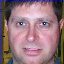

In [36]:
test_img_path_5 = r"C:\Users\HiDeve\Downloads\Face-Images\Face Images\Final Training Images\face1\image_0017_Face_1.jpg"
test_img_5 = image.load_img(test_img_path_5, target_size=(64,64))
test_img_5

In [37]:
test_img_array_5 = image.img_to_array(test_img_5)
test_img_expdim_5 = np.expand_dims(test_img_array_5, axis=0) 
pred3 = Classifier_Model.predict(test_img_expdim_5, verbose=0)
print(pred3.shape)
pred3.round()

(1, 16)


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [2]:
import cv2

# Enable webcam
cap = cv2.VideoCapture(0)

# Deploying a ready-made OpenCV facial recognition model (Haar Cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

while True: 
    ret, frame = cap.read()
    if not ret:
        break

    # Turn to gray for better recognition
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Face recognition
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30,30))

    # Draw a green square around each face.
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)

    # Frame display
    cv2.imshow("Webcam Face Detection", frame)

    # Exit by typing 27 (esc)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()